In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
car_specs = pd.read_csv("archive/car.csv")

In [16]:
car_specs.head()

,id_trim,Make,Modle,Generation,Year_from,Year_to,Series,Trim,Body_type,load_height_mm,...,front_suspension,steering_type,car_class,country_of_origin,number_of_doors,safety_assessment,rating_name,battery_capacity_KW_per_h,electric_range_km,charging_time_h
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(car_specs.info())
print(car_specs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70823 entries, 0 to 70822
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id_trim                                   70823 non-null  int64  
 1   Make                                      70823 non-null  object 
 2   Modle                                     70823 non-null  object 
 3   Generation                                70819 non-null  object 
 4   Year_from                                 70586 non-null  float64
 5   Year_to                                   70189 non-null  float64
 6   Series                                    70823 non-null  object 
 7   Trim                                      70823 non-null  object 
 8   Body_type                                 52252 non-null  object 
 9   load_height_mm                            3363 non-null   object 
 10  number_of_seats                   

In [19]:
MaxThresholdtoRemove = len(car_specs) * 0.5
car_specs = car_specs.dropna(thresh=MaxThresholdtoRemove, axis=1)

In [20]:
car_specs = car_specs.drop_duplicates()

In [21]:
ColumnsToConvert = [
    'number_of_seats',
    'length_mm',
    'width_mm',
    'height_mm',
    'wheelbase_mm',
    'front_track_mm',
    'rear_track_mm',
    'curb_weight_kg',
    'ground_clearance_mm',
    'full_weight_kg',
    'max_trunk_capacity_l',
    'maximum_torque_n_m',
    'turnover_of_maximum_torque_rpm',
    'capacity_cm3',
    'engine_hp_rpm',
    'fuel_tank_capacity_l',
    'max_speed_km_per_h',
    'fuel_grade',
    'minimum_trunk_capacity_l',
    'number_of_cylinders',
    'valves_per_cylinder',
    'cylinder_bore_mm',
    'stroke_cycle_mm',
    'number_of_gears',
    'turning_circle_m',
    'mixed_fuel_consumption_per_100_km_l',
    'acceleration_0_100_km/h_s',
    'city_fuel_per_100km_l',
    'highway_fuel_per_100km_l'
]
for col in ColumnsToConvert:
    car_specs[col] = pd.to_numeric(car_specs[col], errors='coerce')

In [22]:
car_specs.isnull().sum()

id_trim                                    0
Make                                       0
Modle                                      0
Generation                                 4
Year_from                                237
Year_to                                  634
Series                                     0
Trim                                       0
Body_type                              18571
number_of_seats                         7805
length_mm                               6168
width_mm                                6201
height_mm                               6227
wheelbase_mm                            6244
front_track_mm                         21443
rear_track_mm                          21394
curb_weight_kg                         17326
ground_clearance_mm                    31438
full_weight_kg                         31141
max_trunk_capacity_l                   28097
minimum_trunk_capacity_l               24870
maximum_torque_n_m                     11658
injection_

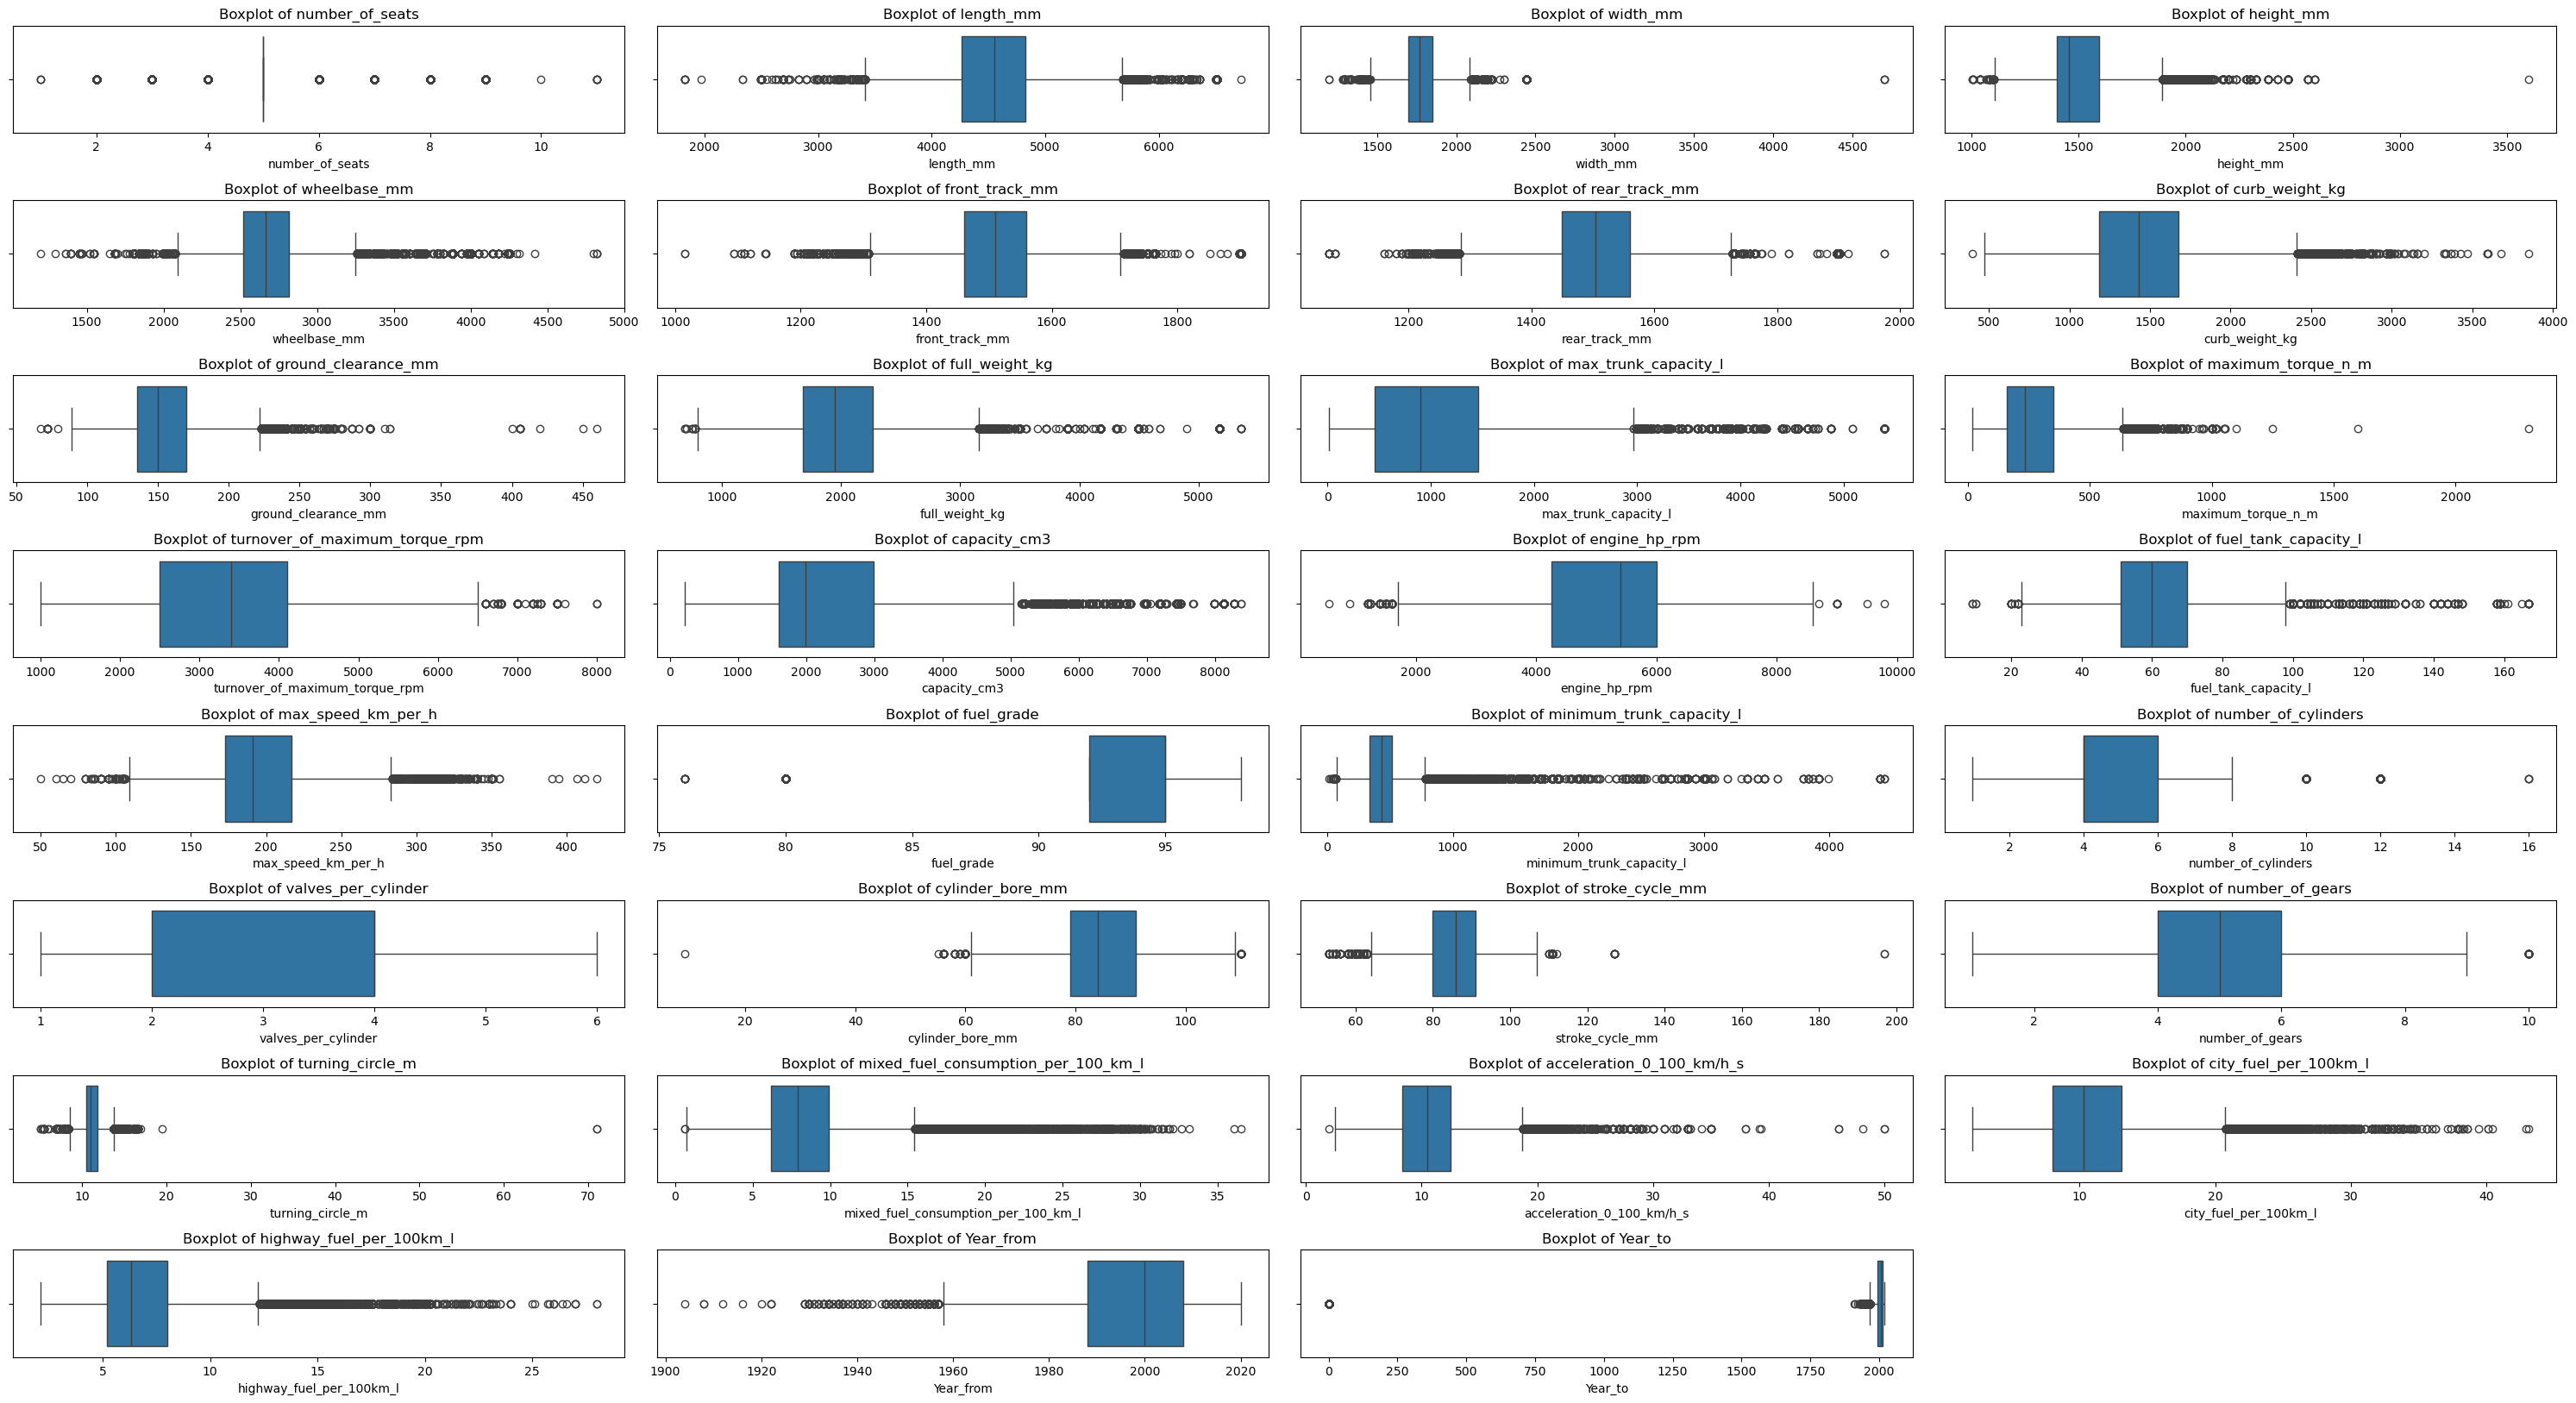

In [23]:
ColumnsToBoxPlots = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 'front_track_mm',
    'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 'full_weight_kg', 'max_trunk_capacity_l',
    'maximum_torque_n_m', 'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm',
    'fuel_tank_capacity_l', 'max_speed_km_per_h', 'fuel_grade', 'minimum_trunk_capacity_l',
    'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 'stroke_cycle_mm', 'number_of_gears',
    'turning_circle_m', 'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s',
    'city_fuel_per_100km_l', 'highway_fuel_per_100km_l', 'Year_from', 'Year_to']


plt.figure(figsize=(30, 20))


for i, col in enumerate(ColumnsToBoxPlots, 1):         #used chatgpt for this line
    plt.subplot(10, 4, i)  
    sns.boxplot(data=car_specs, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('car_specs_boxplots.png', bbox_inches='tight')
plt.show()

In [24]:
for col in ColumnsToBoxPlots:
    car_specs[col] = car_specs[col].fillna(car_specs[col].median())

In [25]:
print("Missing Values in Car Specs:\n", car_specs.isnull().sum(), "\n")

Missing Values in Car Specs:
 id_trim                                    0
Make                                       0
Modle                                      0
Generation                                 4
Year_from                                  0
Year_to                                    0
Series                                     0
Trim                                       0
Body_type                              18571
number_of_seats                            0
length_mm                                  0
width_mm                                   0
height_mm                                  0
wheelbase_mm                               0
front_track_mm                             0
rear_track_mm                              0
curb_weight_kg                             0
ground_clearance_mm                        0
full_weight_kg                             0
max_trunk_capacity_l                       0
minimum_trunk_capacity_l                   0
maximum_torque_n_m       

In [26]:
ColumnTransformMode =['Generation','Body_type','injection_type','cylinder_layout','engine_type','engine_hp','drive_wheels','transmission','back_suspension','rear_brakes','front_brakes','front_suspension']

for col in ColumnTransformMode:
    car_specs[col] = car_specs[col].fillna(car_specs[col].mode()[0])

In [28]:
car_specs.isnull().sum()

id_trim                                0
Make                                   0
Modle                                  0
Generation                             0
Year_from                              0
Year_to                                0
Series                                 0
Trim                                   0
Body_type                              0
number_of_seats                        0
length_mm                              0
width_mm                               0
height_mm                              0
wheelbase_mm                           0
front_track_mm                         0
rear_track_mm                          0
curb_weight_kg                         0
ground_clearance_mm                    0
full_weight_kg                         0
max_trunk_capacity_l                   0
minimum_trunk_capacity_l               0
maximum_torque_n_m                     0
injection_type                         0
cylinder_layout                        0
number_of_cylind

In [29]:
car_specs = car_specs.rename(columns={
    'Modle': 'Model'
})

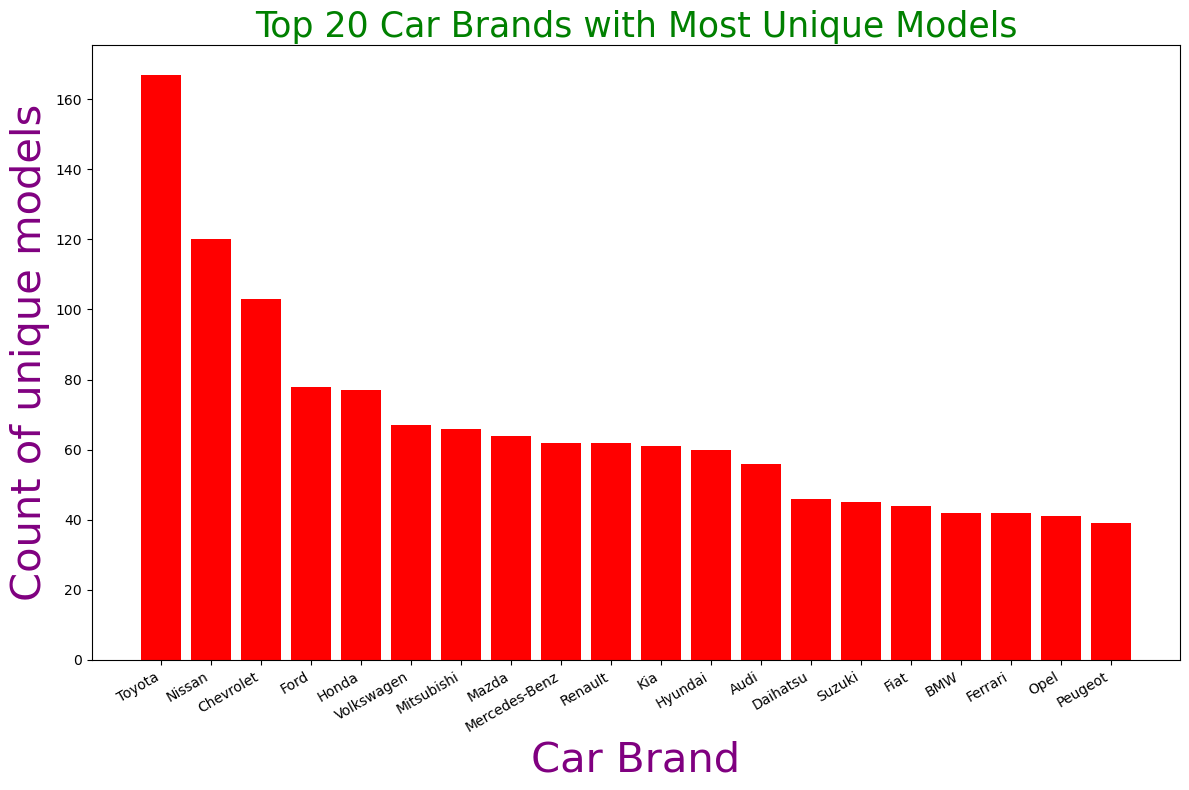

In [30]:
countthemodels = car_specs.groupby('Make')['Model'].nunique()
top20 = countthemodels.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
plt.bar(top20.index, top20.values, color='red')
plt.title("Top 20 Car Brands with Most Unique Models",color='green',size='25')
plt.xlabel("Car Brand",size='30',color='purple')
plt.ylabel("Count of unique models",size='30',color='purple')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('carspecs1.png', bbox_inches='tight')
plt.show()

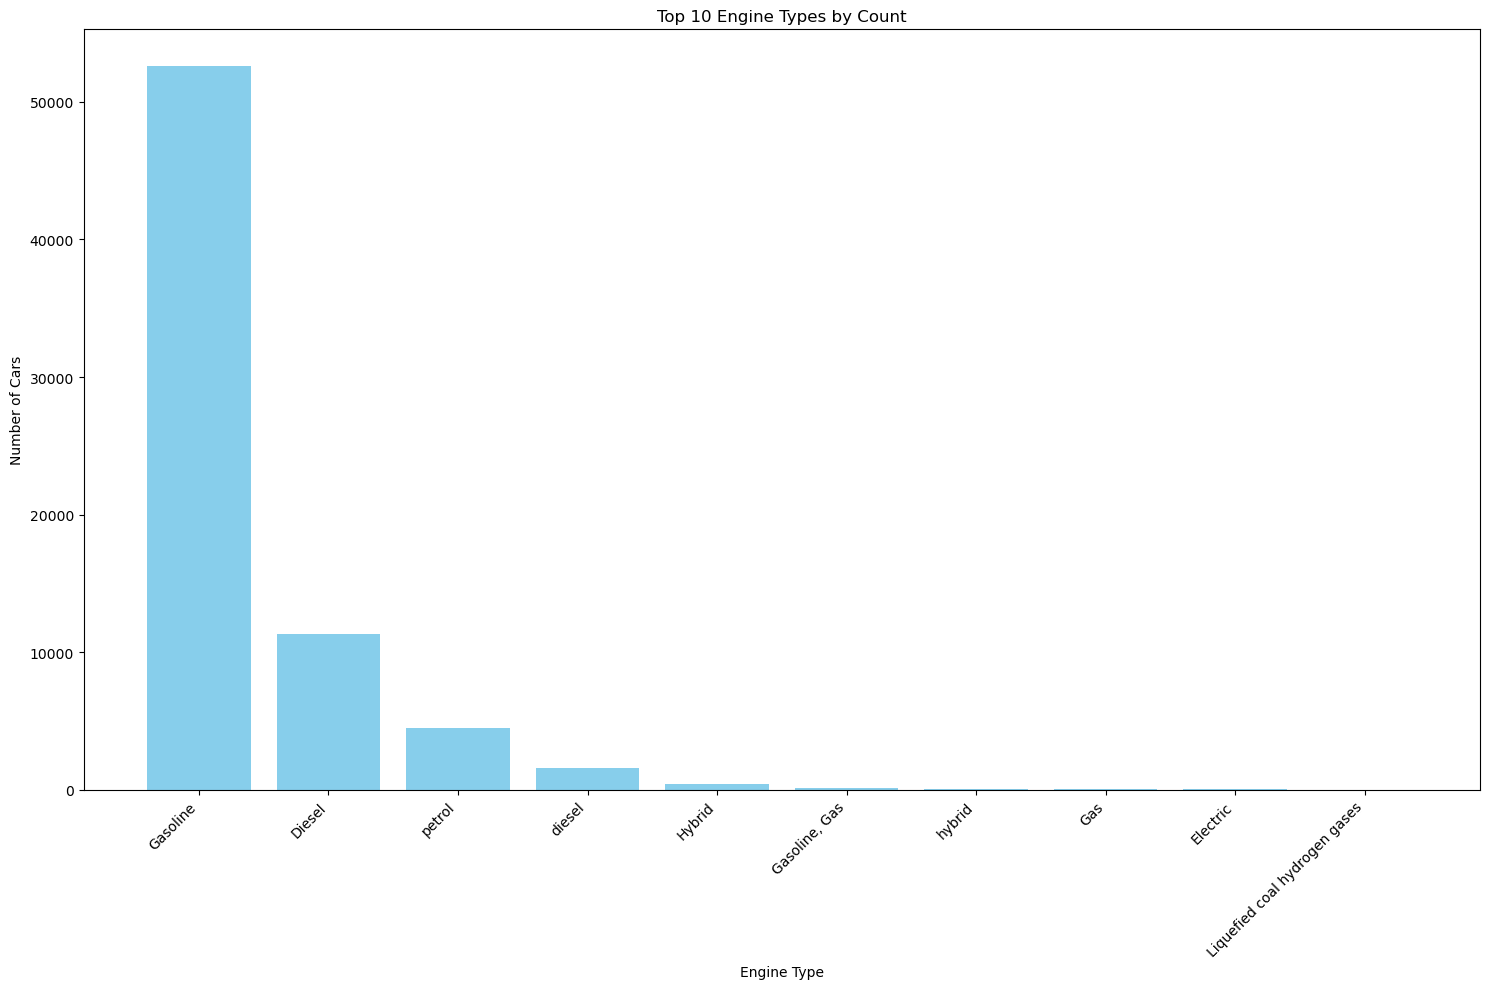

In [31]:
enginecount = car_specs['engine_type'].value_counts().head(10)
plt.figure(figsize=(15, 10))
plt.bar(enginecount.index, enginecount.values, color='skyblue')
plt.title("Top 10 Engine Types by Count")
plt.xlabel("Engine Type")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('carspecs2.png', bbox_inches='tight')
plt.show()

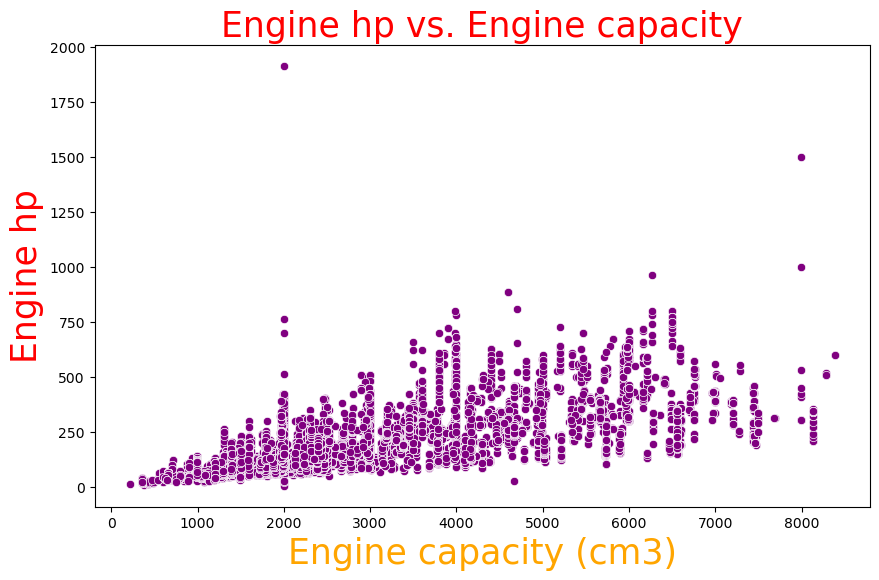

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capacity_cm3', y='engine_hp', data=car_specs,color='purple')
plt.title("Engine hp vs. Engine capacity",color='red',size='25')
plt.xlabel("Engine capacity (cm3)",color='orange',size='25')
plt.ylabel("Engine hp",color ='red',size='25')
plt.savefig('carspecs3.png', bbox_inches='tight')
plt.show()

In [33]:
df_cleaned = car_specs.copy()
outlierremoval = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 
                        'front_track_mm', 'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 
                        'full_weight_kg', 'max_trunk_capacity_l', 'maximum_torque_n_m', 
                        'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm', 
                        'fuel_tank_capacity_l', 'max_speed_km_per_h', 'minimum_trunk_capacity_l', 
                        'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 
                        'stroke_cycle_mm', 'number_of_gears', 'turning_circle_m', 
                        'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s', 
                        'city_fuel_per_100km_l', 'highway_fuel_per_100km_l','Year_from', 'Year_to']
num_outlier_columns = 0  

for col in outlierremoval:
    initial_rows = df_cleaned.shape[0]
        
        
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
        
    outlier_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        
        
    num_removed = outlier_mask.sum()
        
        
    if num_removed > 0:
        num_outlier_columns += 1
        
    print(f"Column '{col}': {num_removed} outlier rows.")
        
       
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nTotal number of columns with outliers : {num_outlier_columns}")

Column 'number_of_seats': 16505 outlier rows.
Column 'length_mm': 2549 outlier rows.
Column 'width_mm': 1678 outlier rows.
Column 'height_mm': 7400 outlier rows.
Column 'wheelbase_mm': 874 outlier rows.
Column 'front_track_mm': 5628 outlier rows.
Column 'rear_track_mm': 4071 outlier rows.
Column 'curb_weight_kg': 1562 outlier rows.
Column 'ground_clearance_mm': 10315 outlier rows.
Column 'full_weight_kg': 5490 outlier rows.
Column 'max_trunk_capacity_l': 4030 outlier rows.
Column 'maximum_torque_n_m': 2174 outlier rows.
Column 'turnover_of_maximum_torque_rpm': 6 outlier rows.
Column 'capacity_cm3': 108 outlier rows.
Column 'engine_hp_rpm': 0 outlier rows.
Column 'fuel_tank_capacity_l': 3 outlier rows.
Column 'max_speed_km_per_h': 1 outlier rows.
Column 'minimum_trunk_capacity_l': 1 outlier rows.
Column 'number_of_cylinders': 0 outlier rows.
Column 'valves_per_cylinder': 0 outlier rows.
Column 'cylinder_bore_mm': 0 outlier rows.
Column 'stroke_cycle_mm': 0 outlier rows.
Column 'number_o

In [34]:
car_specs_numeric = car_specs[outlierremoval]

In [35]:
import numpy as np

columns_to_transform = ['number_of_seats', 'length_mm', 'width_mm', 'height_mm', 'wheelbase_mm', 
                        'front_track_mm', 'rear_track_mm', 'curb_weight_kg', 'ground_clearance_mm', 
                        'full_weight_kg', 'max_trunk_capacity_l', 'maximum_torque_n_m', 
                        'turnover_of_maximum_torque_rpm', 'capacity_cm3', 'engine_hp_rpm', 
                        'fuel_tank_capacity_l', 'max_speed_km_per_h', 'minimum_trunk_capacity_l', 
                        'number_of_cylinders', 'valves_per_cylinder', 'cylinder_bore_mm', 
                        'stroke_cycle_mm', 'number_of_gears', 'turning_circle_m', 
                        'mixed_fuel_consumption_per_100_km_l', 'acceleration_0_100_km/h_s', 
                        'city_fuel_per_100km_l', 'highway_fuel_per_100km_l','Year_from', 'Year_to']


for col in columns_to_transform:
    car_specs_numeric.loc[:, col] = car_specs_numeric[col].apply(lambda x: np.log(x + 1) if x > 0 else 0) #used chatgpt for this line


print(car_specs_numeric[columns_to_transform].head())

   number_of_seats  length_mm  width_mm  height_mm  wheelbase_mm  \
0         1.098612   8.394121  7.534228   7.170888      7.812378   
1         1.098612   8.394121  7.534228   7.170888      7.812378   
2         1.098612   8.394121  7.534228   7.170888      7.813187   
3         1.791759   8.422883  7.479300   7.283448      7.888335   
4         1.791759   8.422883  7.479300   7.283448      7.888335   

   front_track_mm  rear_track_mm  curb_weight_kg  ground_clearance_mm  \
0        7.372118       7.359468        7.320527             4.875197   
1        7.372118       7.359468        7.320527             5.017280   
2        7.372118       7.359468        7.273093             5.017280   
3        7.320527       7.317212        7.266129             5.017280   
4        7.320527       7.317212        7.266129             5.017280   

   full_weight_kg  ...  cylinder_bore_mm  stroke_cycle_mm  number_of_gears  \
0        7.576097  ...          4.430817         4.406719         1.945910

In [36]:
car_specs_numeric = car_specs_numeric.copy()

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
car_specs_numeric.loc[:, outlierremoval] = minmax_scaler.fit_transform(car_specs_numeric[outlierremoval])

In [37]:
print(car_specs_numeric)

       number_of_seats  length_mm  width_mm  height_mm  wheelbase_mm  \
0             0.226294   0.678425  0.327081   0.201651      0.519029   
1             0.226294   0.678425  0.327081   0.201651      0.519029   
2             0.226294   0.678425  0.327081   0.201651      0.519611   
3             0.613147   0.700506  0.287007   0.289917      0.573673   
4             0.613147   0.700506  0.287007   0.289917      0.573673   
...                ...        ...       ...        ...           ...   
70818         0.613147   0.733693  0.295200   0.427846      0.621938   
70819         0.613147   0.733693  0.295200   0.427846      0.621938   
70820         0.613147   0.733693  0.295200   0.427846      0.621938   
70821         0.613147   0.733693  0.295200   0.427846      0.621938   
70822         0.613147   0.733693  0.295200   0.427846      0.621938   

       front_track_mm  rear_track_mm  curb_weight_kg  ground_clearance_mm  \
0            0.715257        0.62552        0.586880      

In [38]:
corr_matrix_specs = car_specs_numeric.corr()
print(corr_matrix_specs)

                                     number_of_seats  length_mm  width_mm  \
number_of_seats                             1.000000   0.103015  0.031140   
length_mm                                   0.103015   1.000000  0.811785   
width_mm                                    0.031140   0.811785  1.000000   
height_mm                                   0.300225   0.249414  0.319530   
wheelbase_mm                                0.128122   0.872376  0.769326   
front_track_mm                              0.052528   0.627591  0.728055   
rear_track_mm                               0.030221   0.614504  0.738870   
curb_weight_kg                              0.072598   0.722015  0.727818   
ground_clearance_mm                         0.049813   0.234618  0.246754   
full_weight_kg                              0.066135   0.628959  0.615775   
max_trunk_capacity_l                        0.246318   0.068701  0.103683   
maximum_torque_n_m                         -0.104267   0.670554  0.711644   

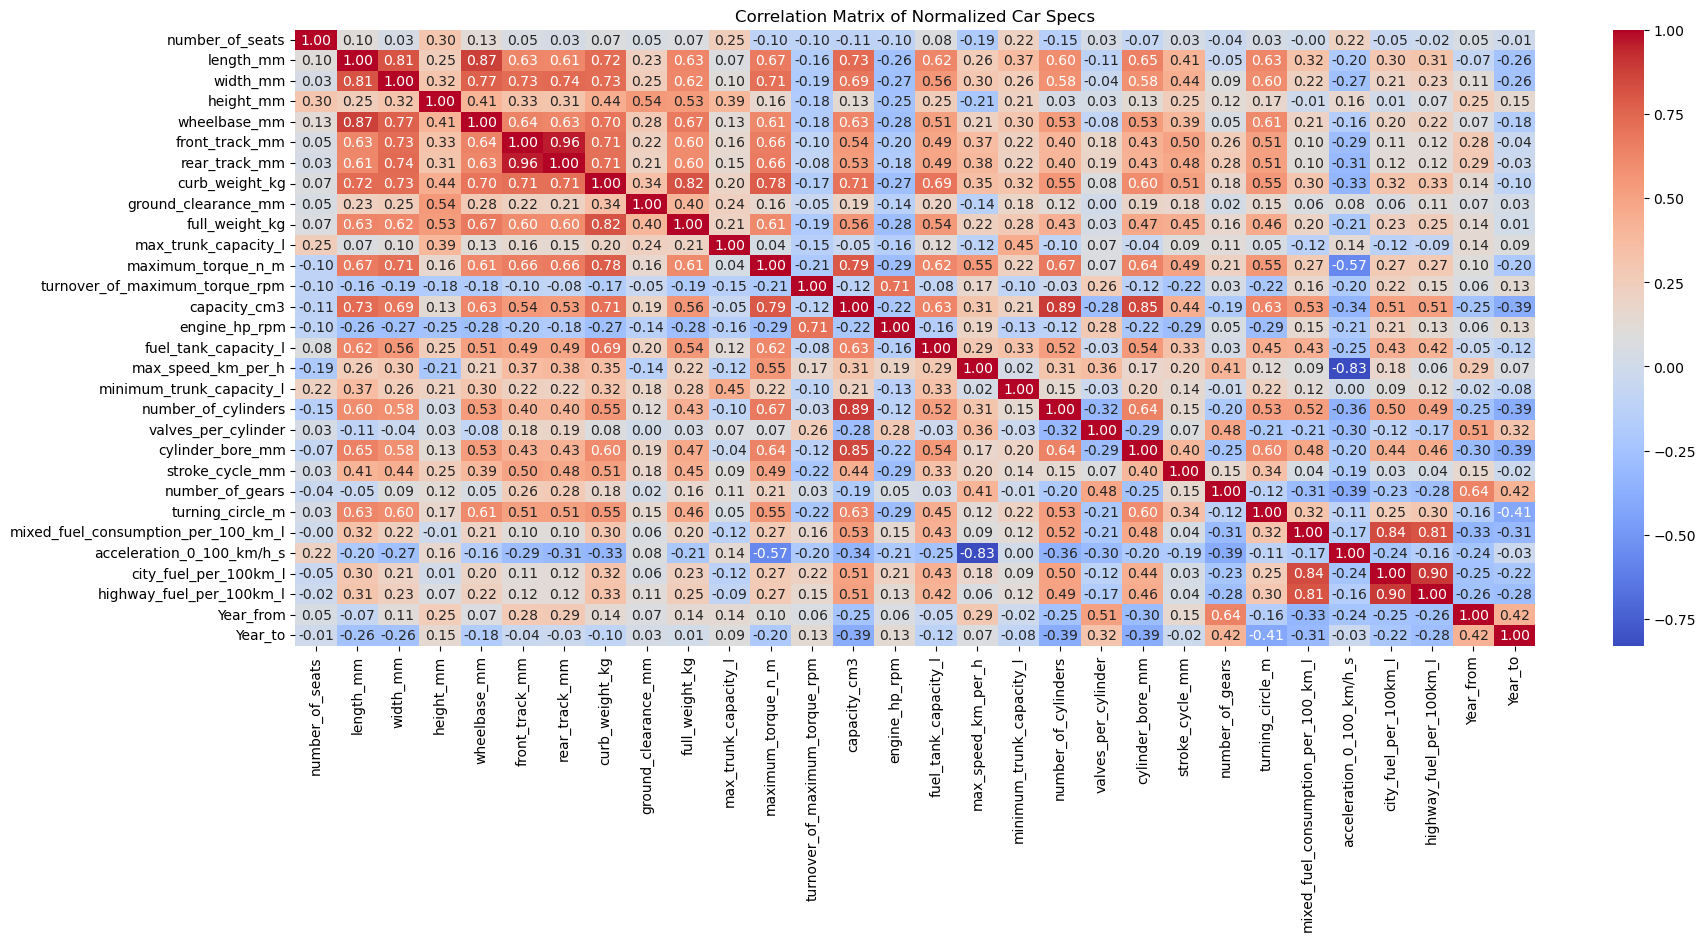

In [40]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_specs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Normalized Car Specs")
plt.savefig('carspecs4.png', bbox_inches='tight')
plt.show()

In [41]:
corr_matrix = car_specs_numeric.corr()

high_corr_vars = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_vars) if i != j]

for pair in high_corr_pairs:
    print(f"High correlation: {pair[0]} and {pair[1]} (corr = {corr_matrix.loc[pair[0], pair[1]]:.2f})")

High correlation: length_mm and width_mm (corr = 0.81)
High correlation: length_mm and wheelbase_mm (corr = 0.87)
High correlation: width_mm and length_mm (corr = 0.81)
High correlation: wheelbase_mm and length_mm (corr = 0.87)
High correlation: front_track_mm and rear_track_mm (corr = 0.96)
High correlation: rear_track_mm and front_track_mm (corr = 0.96)
High correlation: curb_weight_kg and full_weight_kg (corr = 0.82)
High correlation: full_weight_kg and curb_weight_kg (corr = 0.82)
High correlation: capacity_cm3 and number_of_cylinders (corr = 0.89)
High correlation: capacity_cm3 and cylinder_bore_mm (corr = 0.85)
High correlation: max_speed_km_per_h and acceleration_0_100_km/h_s (corr = -0.83)
High correlation: number_of_cylinders and capacity_cm3 (corr = 0.89)
High correlation: cylinder_bore_mm and capacity_cm3 (corr = 0.85)
High correlation: mixed_fuel_consumption_per_100_km_l and city_fuel_per_100km_l (corr = 0.84)
High correlation: mixed_fuel_consumption_per_100_km_l and highwa

In [42]:
car_specs.to_csv("car_specs_cleaned.csv", index=False)